# Percettrone - Test 1

In [1]:
from sklearn.model_selection import train_test_split
import lib.neuron as neuron
import seaborn as sns
import pandas as pd
import math

<hr>

#### Caricamento dei dati

In [2]:
data = pd.read_csv("./data/marziani.csv")
data

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,viola,29.0,4.55,35.48,68.47
1996,Simmy,blu,23.0,3.84,29.86,71.51
1997,Simmy,viola,22.0,4.55,29.41,68.38
1998,Simmy,rosso,27.0,4.53,33.12,68.10


<hr>

#### Informazioni sui dati

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     2000 non-null   object 
 1   colore     1993 non-null   object 
 2   n_arti     1994 non-null   float64
 3   peso       2000 non-null   float64
 4   altezza    1995 non-null   float64
 5   larghezza  1997 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


In [4]:
data["specie"].unique()

array(['Robby', 'Simmy'], dtype=object)

In [5]:
data[data["specie"] == "Robby"].describe()

,n_arti,peso,altezza,larghezza
count,999.000000,1000.000000,996.000000,999.000000
mean,24.637638,3.500900,17.518082,84.719429
std,2.899248,0.489139,4.227621,11.456814
min,20.000000,2.130000,3.170000,44.700000
25%,22.000000,3.170000,14.740000,77.045000
50%,25.000000,3.490000,17.330000,84.890000
75%,27.000000,3.830000,20.307500,92.510000
max,29.000000,5.050000,29.400000,117.450000


In [6]:
data[data["specie"] == "Simmy"].describe()

,n_arti,peso,altezza,larghezza
count,995.000000,1000.000000,999.000000,998.000000
mean,24.544724,4.490280,32.769620,70.241653
std,2.883513,0.518585,5.755694,3.345319
min,20.000000,2.850000,15.630000,59.440000
25%,22.000000,4.147500,29.070000,68.000000
50%,25.000000,4.505000,32.640000,70.330000
75%,27.000000,4.850000,36.475000,72.610000
max,29.000000,6.110000,49.750000,80.260000


<hr>

#### Conversione dati qualitativi in dati numerici

In [7]:
data["colore"].unique()

array(['viola', 'blu', 'rosso', nan], dtype=object)

In [8]:
num_data = data.copy()

c = num_data["colore"].unique()
s = num_data["specie"].unique()

colours = {key: value for value, key in enumerate(c)}
species = {key: value for value, key in enumerate(s)}

for color in colours:
    num_data["colore"].replace(color, colours[color], inplace = True)

for kind in species:
    num_data["specie"].replace(kind, species[kind], inplace = True)

num_data

,specie,colore,n_arti,peso,altezza,larghezza
0,0,0.0,20.0,3.87,14.77,73.22
1,0,0.0,27.0,3.15,28.19,88.44
2,0,0.0,25.0,4.35,12.05,76.74
3,0,1.0,20.0,3.76,9.90,81.37
4,0,1.0,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,1,0.0,29.0,4.55,35.48,68.47
1996,1,1.0,23.0,3.84,29.86,71.51
1997,1,0.0,22.0,4.55,29.41,68.38
1998,1,2.0,27.0,4.53,33.12,68.10


<hr>

#### Grafici confronto features

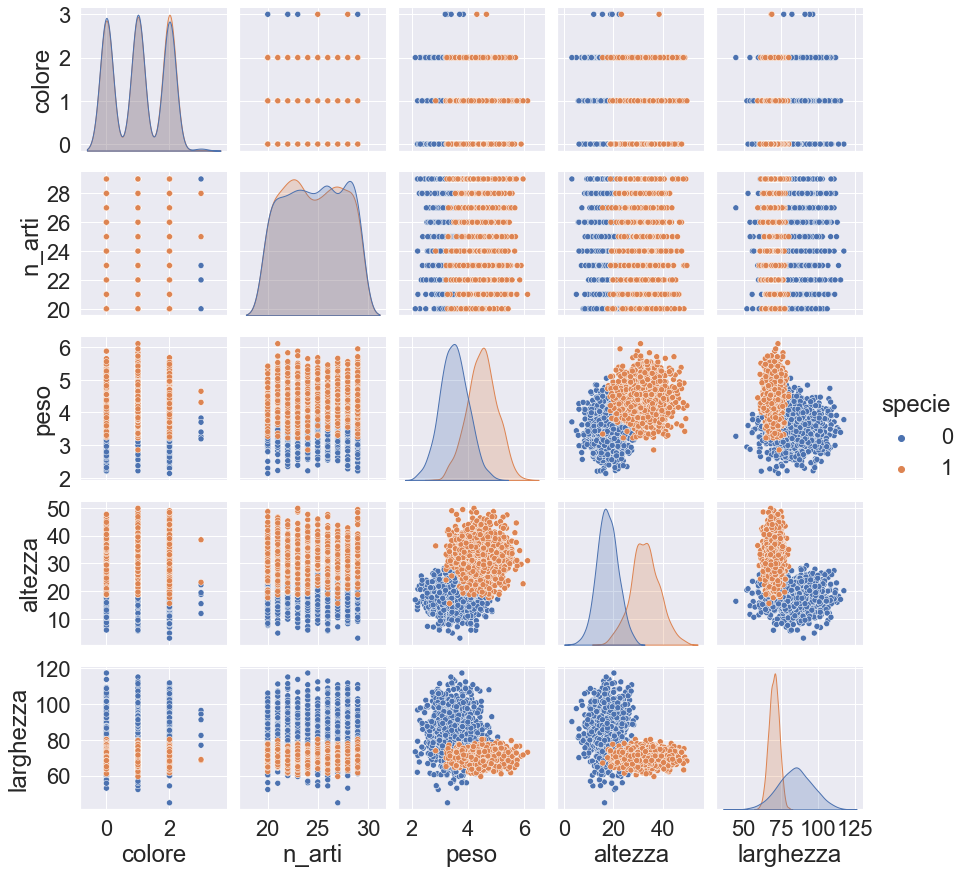

In [9]:
sns.set_theme(font_scale = 2)
sns.pairplot(num_data, hue = "specie", dropna = True)
sns.set()

<hr>

#### Selezione delle features da utilizzare e pulizia dei dati

In [10]:
tmp_data = num_data[["specie", "peso", "altezza", "larghezza"]]
tmp_data.dropna(axis = 'index', inplace = True)

selected_data = pd.DataFrame(tmp_data[["peso", "altezza", "larghezza"]])

C:\Linguaggi\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   peso       1992 non-null   float64
 1   altezza    1992 non-null   float64
 2   larghezza  1992 non-null   float64
dtypes: float64(3)
memory usage: 62.2 KB


In [12]:
X_not_norm = selected_data.copy()
X_not_norm

,peso,altezza,larghezza
0,3.87,14.77,73.22
1,3.15,28.19,88.44
2,4.35,12.05,76.74
3,3.76,9.90,81.37
4,2.86,19.87,84.65
...,...,...,...
1995,4.55,35.48,68.47
1996,3.84,29.86,71.51
1997,4.55,29.41,68.38
1998,4.53,33.12,68.10


In [13]:
y = tmp_data["specie"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: specie, Length: 1992, dtype: int64

<hr>

#### Normalizzazione dei dati

In [14]:
m = X_not_norm.mean()
s = X_not_norm.std()

X = (X_not_norm - m) / s
X

,peso,altezza,larghezza
0,-0.177221,-1.135252,-0.383269
1,-1.198221,0.333125,0.988050
2,0.503445,-1.432866,-0.066118
3,-0.333207,-1.668113,0.351044
4,-1.609457,-0.577225,0.646572
...,...,...,...
1995,0.787056,1.130775,-0.811243
1996,-0.219763,0.515851,-0.537340
1997,0.787056,0.466614,-0.819352
1998,0.758695,0.872551,-0.844580


<hr>

#### Separazione dati di training e dati di test

In [15]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(X, y, train_size = 0.7, random_state = 0)

<hr>

#### Addestramento del modello

In [16]:
n = neuron.Neuron(3, 0.17, lambda x: 1 / (1 + math.exp(-x)))
n.fit(training_set_X.values, training_set_y.values, 50000)

<hr>

#### Test del modello

In [17]:
input_data = test_set_X.values
expeted_output_data = test_set_y.values

print(n.score(input_data, expeted_output_data))

0.9882943143812709
